# Exploratory data analysis of Spotify MPD

## Dataset structure

The data is structured in arrays that typically contains 1,000 playlists. Each playlist is a dictionary that contains the following fields:

+ **pid** - integer - playlist id - the MPD ID of this playlist. This is an integer between 0 and 999,999.
+ **name** - string - the name of the playlist
+ **description** - optional string - if present, the description given to the playlist. Note that user-provided playlist descrptions are a relatively new feature of Spotify, so most playlists do not have descriptions.
+ **modified_at** - seconds - timestamp (in seconds since the epoch) when this playlist was last updated. Times are rounded to midnight GMT of the date when the playlist was last updated.
+ **num_artists** - the total number of unique artists for the tracks in the playlist.
+ **num_albums** - the number of unique albums for the tracks in the playlist
+ **num_tracks** - the number of tracks in the playlist
+ **num_followers** - the number of followers this playlist had at the time the MPD was created. (Note that the follower count does not including the playlist creator)
+ **num_edits** - the number of separate editing sessions. Tracks added in a two hour window are considered to be added in a single editing session.
+ **duration_ms** - the total duration of all the tracks in the playlist (in milliseconds)
+ **collaborative** - boolean - if true, the playlist is a collaborative playlist. Multiple users may contribute tracks to a collaborative playlist.
+ **tracks** - an array of information about each track in the playlist. Each element in the array is a dictionary with the following fields:
    - **track_name** - the name of the track
    - **track_uri** - the Spotify URI of the track
    - **album_name** - the name of the track's album
    - **album_uri** - the Spotify URI of the album
    - **artist_name** - the name of the track's primary artist
    - **artist_uri** - the Spotify URI of track's primary artist
    - **duration_ms** - the duration of the track in milliseconds
    - **pos** - the position of the track in the playlist (zero-based)

In [5]:
df_playlists_info.columns

Index(['collaborative', 'duration_ms', 'modified_at', 'name', 'num_albums',
       'num_artists', 'num_edits', 'num_followers', 'num_tracks', 'pid'],
      dtype='object')

## Analysis of number of followers, artists, and edits, split by 'collaborative' class

### Histogram distributions and Observations

In [ ]:
print('There were {0} collaborative playlists.'.format(sum(social_df['collaborative'] == 1)))
print('There were {0} non-collaborative playlists.'.format(sum(social_df['collaborative'] == 0)))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000389DAA160>,
      dtype=object)

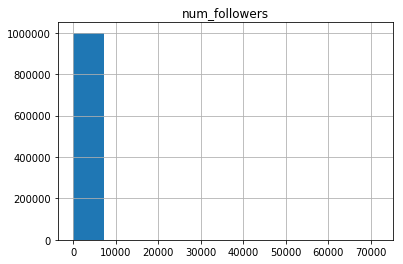

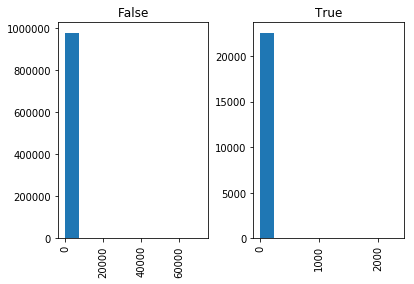

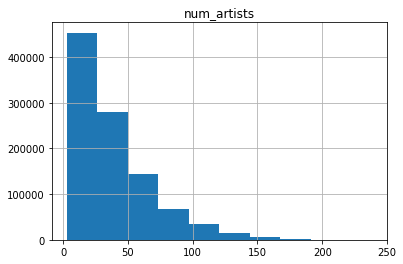

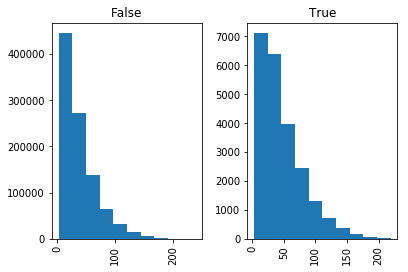

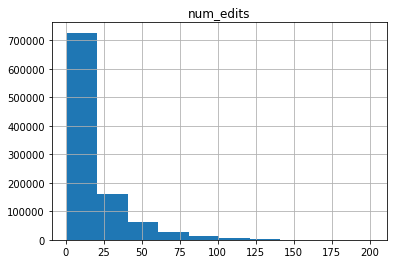

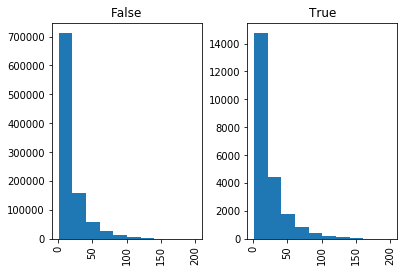

In [8]:
df_playlists_info.hist(column='num_followers')
df_playlists_info.hist(column='num_followers', by='collaborative')

df_playlists_info.hist(column='num_artists')
df_playlists_info.hist(column='num_artists', by='collaborative')


df_playlists_info.hist(column='num_edits')
df_playlists_info.hist(column='num_edits', by='collaborative')

From above histograms, it seems that the collaborative playlist has less number of followers compared to the personal playlist.
And collaborative has more number of edits compared to the personal playlist.
Also we can see collaborative has more diversity. 

## Analysis of number of edits, followers, and artists by collaboration class

### Boxplots

Let's analyse some boxplots for each of number of edits, followers, and artists by collaboration class

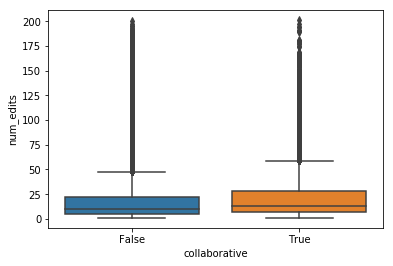

In [3]:
sns.boxplot(x='collaborative', y='num_edits', data=df_playlists_info)

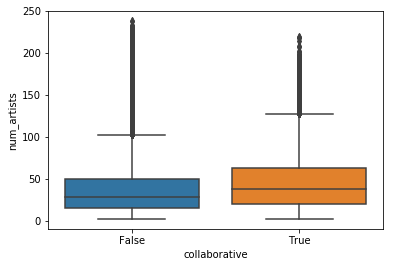

In [4]:
sns.boxplot(x='collaborative', y='num_artists', data=df_playlists_info)

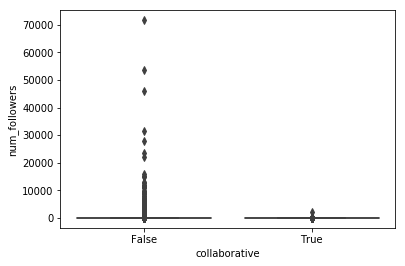

In [5]:
sns.boxplot(x='collaborative', y='num_followers', data=df_playlists_info)

## Top Playlists, tracks and artists

Let's analyse the top tracks, artists, and genres

In [9]:
print ("number of playlists", total_playlists)
print ("number of tracks", total_tracks)
print ("number of unique tracks", len(tracks))
print ("number of unique albums", len(albums))
print ("number of unique artists", len(artists))
print ("number of unique titles", len(titles))
print ("number of playlists with descriptions", total_descriptions)
print ("number of unique normalized titles", len(ntitles))
print ("avg playlist length", float(total_tracks) / total_playlists)

number of playlists 1000000
number of tracks 66346428
number of unique tracks 2262292
number of unique albums 734684
number of unique artists 295860
number of unique titles 92944
number of playlists with descriptions 18760
number of unique normalized titles 17266
avg playlist length 66.346428


### Top 20 playlist

Text(0,0.5,'Count')

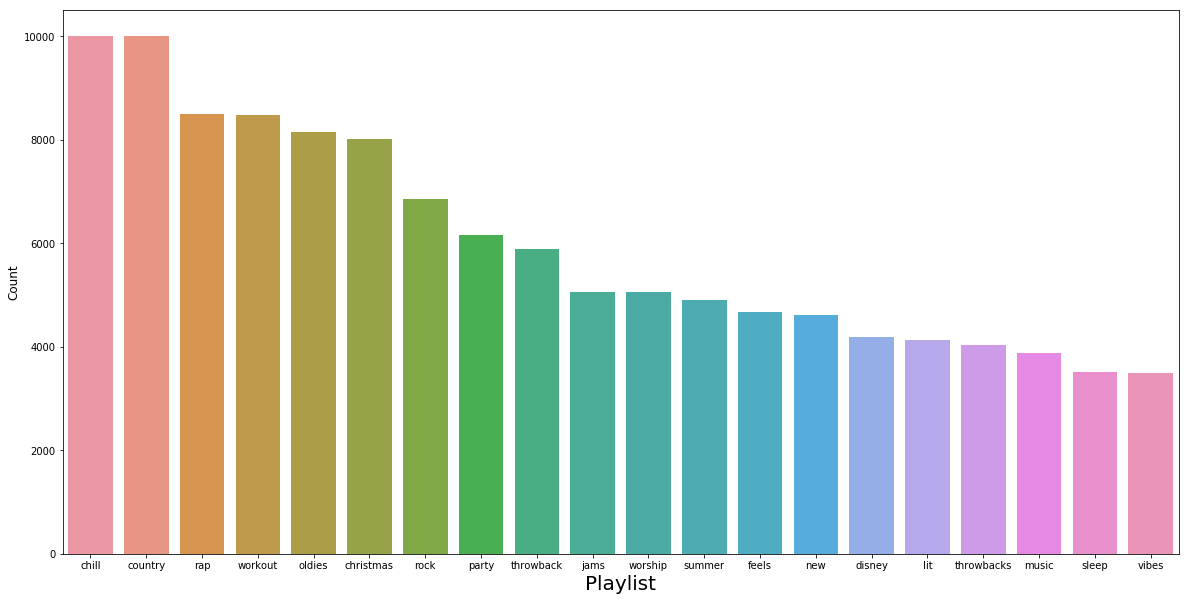

In [34]:
df = pd.DataFrame.from_dict(title_histogram, orient='index',).reset_index()
df.columns = ['title','count']
plt.figure(figsize=(20,10))
ax = sns.barplot(x="title", y="count", data=df.nlargest(20, 'count'))
plt.xlabel('Playlist',fontsize = 20)
plt.ylabel('Count',fontsize = 20)


The country and chill has the highest count playlist. 

### Top 20 Tracks

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

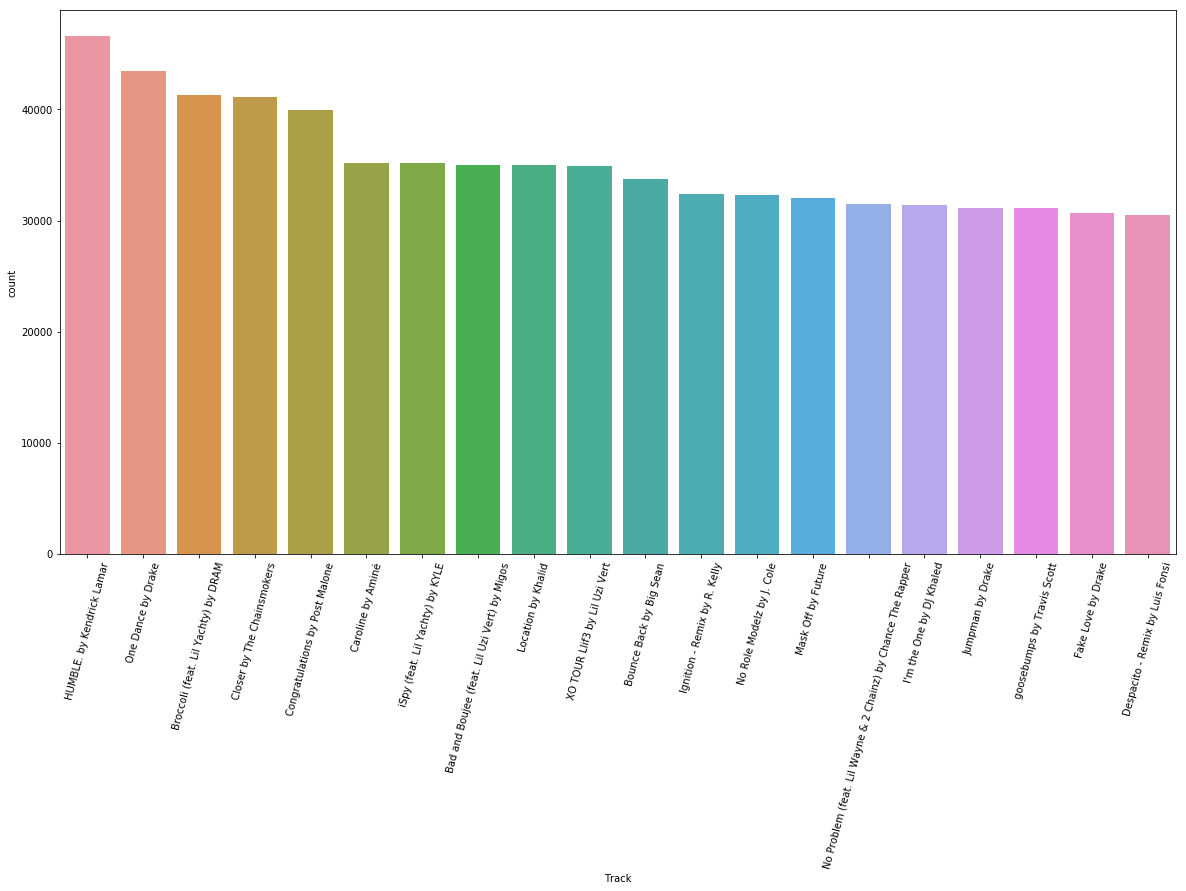

In [31]:
df = pd.DataFrame.from_dict(track_histogram, orient='index',).reset_index()
df.columns = ['title','count']
plt.figure(figsize=(20,10))
ax = sns.barplot(x="title", y="count", data=df.nlargest(20, 'count'))
plt.xlabel('Track',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.xticks(rotation = 75)

Looking at the above top 20 tracks, after the first 5 top songs/tracks all others are pretty evenly spread(played almost equal number of times). 

### Top 20 Artists

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

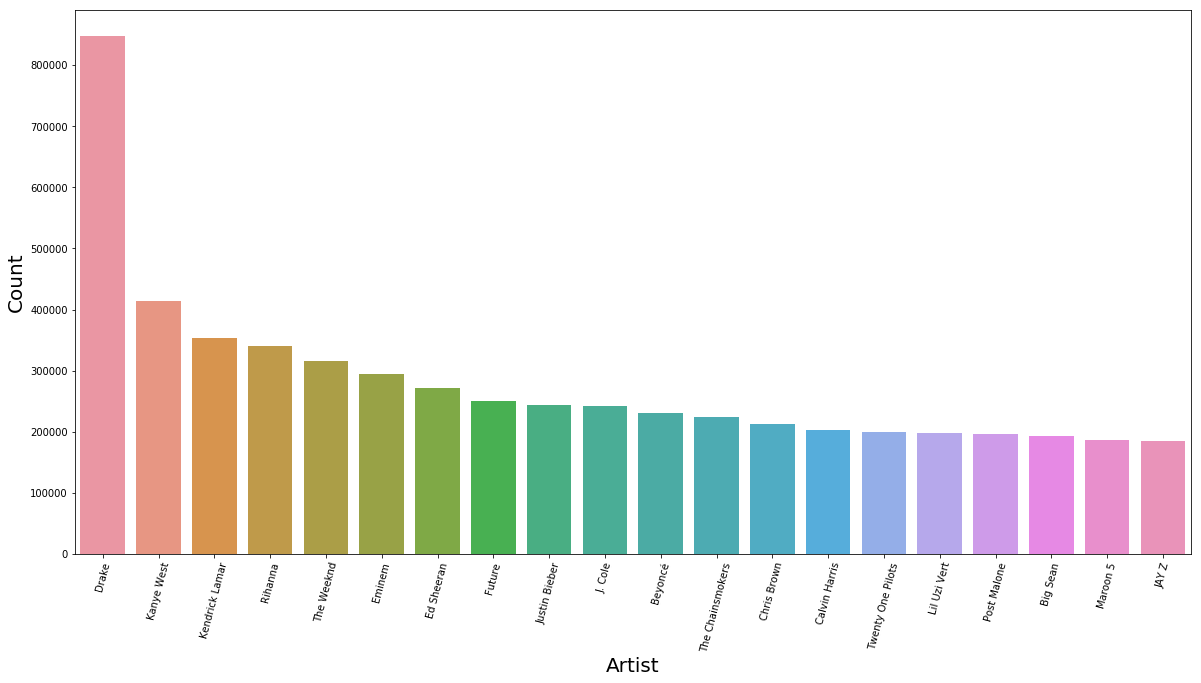

In [35]:
df = pd.DataFrame.from_dict(artist_histogram, orient='index',).reset_index()
df.columns = ['title','count']
plt.figure(figsize=(20,10))
ax = sns.barplot(x="title", y="count", data=df.nlargest(20, 'count'))
# ax.set_xticklabels( rotation=75)
plt.xlabel('Artist',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.xticks(rotation = 75)

It seems that drake&apos;s song has appeared most among playlists.

## Analysing Number of Edits, Playlist Length and Number of Followers

#### Histogram

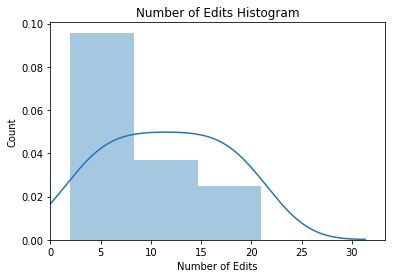

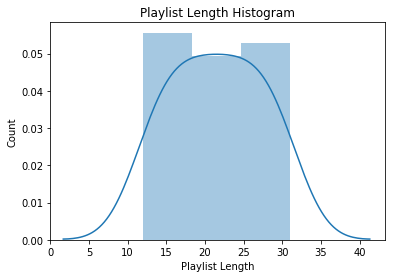

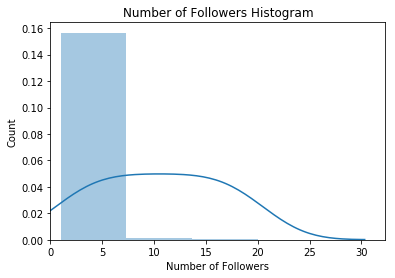

In [9]:
def show_histogram(hist, num, var):
    common = np.array(hist.most_common(num))
    sns.distplot(common[:,0], hist_kws={"weights":common[:,1]})

    plt.xlim(0, None)
    plt.title(var)
    plt.xlabel(' '.join(var.split()[:-1]))
    plt.ylabel('Count')

    plt.show()
    
show_histogram(num_edits_histogram, 20, 'Number of Edits Histogram')
show_histogram(playlist_length_histogram, 20, 'Playlist Length Histogram')
show_histogram(num_followers_histogram, 20, 'Number of Followers Histogram')

#### Observation

It seems that most people edit their playlists less than about 10 times. This makes sense, as each "edit" is a two-hour window of adding/removing songs, and most people just create an entirely new playlist instead of continually editing over the span of weeks or months. Additionally, most people have playlists that are between 15 and 30 songs in length, resulting in playlists that are about 90 minutes to 2 hours long. And, the vast majority of playlists have 5 or fewer followers. That means most playlists are quite personal and may serve to capture the specific songs of genre or mood that the user actually likes.

# Exploring Spotify API for song features

Here additionaly to get the individual meta data and audio features of the songs we are using Spotify's APIs.
After analysing 13 of these audio features are selected to be used. The features for each song as follow:

## Audio features description:

`Danceability`: Describes the suitability of a track for dancing. This is based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

`Energy`: A measure from 0.0 to 1.0, and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

`Key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 2 = D, and so on.

`Loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

`Mode`: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

`Speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent instrumental music and other non-speech-like tracks.

`Acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence that the track is acoustic.

`Instrumentalness`: Predicts whether a track contains no vocals. &quot;Ooh&quot; and &quot;aah&quot; sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly &quot;vocal&quot;. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

`Liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

`Valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (for example happy, cheerful, euphoric), while tracks with low valence sound more negative (for example sad, depressed, angry).

`Tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.

`Duration_ms`: The duration of the track in milliseconds.